In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
import torch.nn.functional as F

In [ ]:
transform= transforms.ToTensor()
mnist_pytorch = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x), 0.2)
        x = nn.functional.leaky_relu(self.fc2(x), 0.2)
        x = nn.functional.leaky_relu(self.fc3(x), 0.2)
        x = nn.functional.sigmoid(self.fc4(x))
        return x

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 784)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x), 0.2)
        x = nn.functional.leaky_relu(self.fc2(x), 0.2)
        x = nn.functional.leaky_relu(self.fc3(x), 0.2)
        x = nn.functional.tanh(self.fc4(x))
        return x

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
BATCH_SIZE = 32
N_EPOCHS = 10
LEARNING_RATE = 0.0002
dataloader =DataLoader(mnist_pytorch, batch_size=BATCH_SIZE)
netD = Discriminator().to(device)
netG = Generator().to(device)

optimizerD = optim.Adam(netD.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
criterion = nn.BCELoss()

In [ ]:
print(device)

cuda


In [ ]:
for epoch in range(N_EPOCHS):

    for i, batch in enumerate(dataloader):
        # Train discriminator
        size = batch[0].shape[0]
        netD.zero_grad()
        noise = torch.randn((size, 100)).view(-1, 100).to(device)
        real_images = batch[0].to(device)
        real_images = real_images.view(-1, 784)
        real_labels = torch.ones((size, 1)).to(device)
        output_real = netD(real_images)
        errD_real = criterion(output_real, real_labels)

        fake_labels = torch.zeros((size, 1)).to(device)
        fake_images = netG(noise)
        output_fake = netD(fake_images)
        errD_fake = criterion(output_fake, fake_labels)
        d_loss = (errD_real + errD_fake)/2
        d_loss.backward()
        optimizerD.step()


        # Train generator
        # G > D
        netG.zero_grad()
        noise = torch.randn((size, 100)).view(-1, 100).to(device)
        fake_images = netG(noise)
        output = netD(fake_images)

        errG = criterion(output, real_labels)
        errG.backward()
        optimizerG.step()
    # Print progress
    print(f"Epoch [{epoch+1}/{N_EPOCHS}] Loss D: {d_loss:.4f}, Loss G: {errG:.4f}")


Epoch [1/10] Loss D: 0.3228, Loss G: 2.7978
Epoch [2/10] Loss D: 0.3426, Loss G: 2.9076
Epoch [3/10] Loss D: 0.1846, Loss G: 3.7529
Epoch [4/10] Loss D: 0.1078, Loss G: 3.3924
Epoch [5/10] Loss D: 0.1678, Loss G: 5.0425
Epoch [6/10] Loss D: 0.0607, Loss G: 5.5164
Epoch [7/10] Loss D: 0.0176, Loss G: 4.5725
Epoch [8/10] Loss D: 0.0614, Loss G: 4.6271
Epoch [9/10] Loss D: 0.0823, Loss G: 5.2070
Epoch [10/10] Loss D: 0.0586, Loss G: 4.5489


In [ ]:
noise = torch.randn((size, 100)).view(-1, 100).to(device)

In [ ]:
output =netG(noise)

In [ ]:
output = output.view(-1, 1,  28, 28)
grid = make_grid(output, nrow=10).cpu().detach().numpy()
grid.shape

(3, 122, 302)

In [ ]:
output.shape

torch.Size([32, 1, 28, 28])

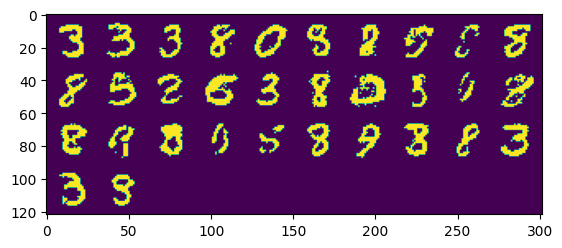

In [ ]:
plt.imshow(grid[0]>0.5)